<a href="https://colab.research.google.com/github/srtgf13/icp-3-sreenivas/blob/main/ICP_3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Importing  required libraries :
import pandas as pd 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download("popular")
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data

In [29]:
Data = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')
Data=Data.drop(columns=['id'])
feature=Data.iloc[:,1].values
labels=Data.iloc[:,0].values


In [21]:
feature

array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       'listening to sad songs on a monday morning otw to work is sad  ',
       '@user #sikh #temple vandalised in in #calgary, #wso condemns  act  ',
       'thank you @user for you follow  '], dtype=object)

In [22]:
shape= Data.shape
print(shape)
columns=Data.columns
print(columns)

(31962, 2)
Index(['label', 'tweet'], dtype='object')


In [23]:
Data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [24]:
count=Data.label.value_counts()
count

0    29720
1     2242
Name: label, dtype: int64

In [25]:
Data.isnull().values.any()

False

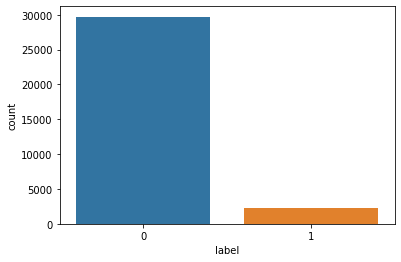

In [26]:
import seaborn as sns
sns.countplot(x='label',data=Data)

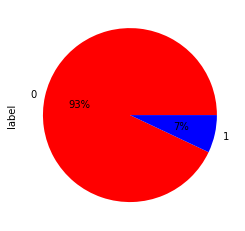

In [61]:
count.plot(kind='pie',autopct='%1.0f%%',colors=["red","blue"])

In [45]:
words=[]
import re
for sentence in range(0,len(feature)):
   feature_processed = " ".join([word for word in  feature[sentence].split()
                              if 'http' not in word and '@' not in word and '<' not in word])
   feature_processed  =  feature_processed .lower()
   feature_processed =re.sub('[!@#$:).;,?&/'']', '',   feature_processed )
   feature_processed = re.sub('  ', ' ',   feature_processed )
   feature_processed  =   feature_processed .replace('\'','',)
   feature_processed = re.sub('[^(A-Z,a-z,0-9)]',' ',  feature_processed )
   feature_processed = re.sub(r'\s+[a-zA-Z]\s+', ' ',  feature_processed )
   feature_processed  = re.sub(r'\s+', ' ',  feature_processed , flags=re.I)  
   words.append( feature_processed )


In [46]:
words

['when father is dysfunctional and is so selfish he drags his kids into his dysfunction run',
 'thanks for lyft credit cant use cause they dont offer wheelchair vans in pdx disapointed getthanked',
 'bihday your majesty',
 'model love take with all the time in ur ',
 'factsguide society now motivation',
 ' 22 huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo',
 'camping tomorrow danny ',
 'the next school year is the year for exams cant think about that school exams hate imagine actorslife revolutionschool girl',
 'we won love the land allin cavs champions cleveland clevelandcavaliers ',
 'welcome here im its so gr8 ',
 ' ireland consumer price index (mom climbed from previous 02 to 05 in may blog silver gold forex',
 'we are so selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love ',
 'i get to see my daddy today 80days gettingfed',
 'cnn calls michigan middle school build t

In [50]:
from nltk.tokenize import word_tokenize 
  
  
stop_words = set(stopwords.words('english')) 
  
word_tokens = word_tokenize(str(words)) 
  

filtered_sentence = [w for w in word_tokens if not w in stop_words]   
filtered_sentence = [] 
  
for w in word_tokens: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
  

print(filtered_sentence[0:1000]) 

['[', "'when", 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'dysfunction', 'run', "'", ',', "'thanks", 'lyft', 'credit', 'cant', 'use', 'cause', 'dont', 'offer', 'wheelchair', 'vans', 'pdx', 'disapointed', 'getthanked', "'", ',', "'bihday", 'majesty', "'", ',', "'model", 'love', 'take', 'time', 'ur', "'", ',', "'factsguide", 'society', 'motivation', "'", ',', "'", '22', 'huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', 'allshowandnogo', "'", ',', "'camping", 'tomorrow', 'danny', "'", ',', "'the", 'next', 'school', 'year', 'year', 'exams', 'cant', 'think', 'school', 'exams', 'hate', 'imagine', 'actorslife', 'revolutionschool', 'girl', "'", ',', "'we", 'love', 'land', 'allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers', "'", ',', "'welcome", 'im', 'gr8', "'", ',', "'", 'ireland', 'consumer', 'price', 'index', '(', 'mom', 'climbed', 'previous', '02', '05', 'may', 'blog', 'silver', 'gold', 'forex', "'", ',', "'we", 'selfish', 'orland

In [52]:

sentence=sent_tokenize(str(words))
print(sentence)


["['when father is dysfunctional and is so selfish he drags his kids into his dysfunction run', 'thanks for lyft credit cant use cause they dont offer wheelchair vans in pdx disapointed getthanked', 'bihday your majesty', 'model love take with all the time in ur ', 'factsguide society now motivation', ' 22 huge fan fare and big talking before they leave chaos and pay disputes when they get there allshowandnogo', 'camping tomorrow danny ', 'the next school year is the year for exams cant think about that school exams hate imagine actorslife revolutionschool girl', 'we won love the land allin cavs champions cleveland clevelandcavaliers ', 'welcome here im its so gr8 ', ' ireland consumer price index (mom climbed from previous 02 to 05 in may blog silver gold forex', 'we are so selfish orlando standwithorlando pulseshooting orlandoshooting biggerproblems selfish heabreaking values love ', 'i get to see my daddy today 80days gettingfed', 'cnn calls michigan middle school build the wall cha

In [55]:

token = word_tokenize(str(words))
print(token[0:10000])

['[', "'when", 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', 'run', "'", ',', "'thanks", 'for', 'lyft', 'credit', 'cant', 'use', 'cause', 'they', 'dont', 'offer', 'wheelchair', 'vans', 'in', 'pdx', 'disapointed', 'getthanked', "'", ',', "'bihday", 'your', 'majesty', "'", ',', "'model", 'love', 'take', 'with', 'all', 'the', 'time', 'in', 'ur', "'", ',', "'factsguide", 'society', 'now', 'motivation', "'", ',', "'", '22', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there', 'allshowandnogo', "'", ',', "'camping", 'tomorrow', 'danny', "'", ',', "'the", 'next', 'school', 'year', 'is', 'the', 'year', 'for', 'exams', 'cant', 'think', 'about', 'that', 'school', 'exams', 'hate', 'imagine', 'actorslife', 'revolutionschool', 'girl', "'", ',', "'we", 'won', 'love', 'the', 'land', 'allin', 'cavs', 'champions', 'cleveland', 'clevelandca

In [62]:
ps = PorterStemmer() 
   

token = word_tokenize(str(words[0:1000])) 
   
for w in token: 
    print(w, " : ", ps.stem(w)) 

Streaming output truncated to the last 5000 lines.
'  :  '
socialmedia  :  socialmedia
us  :  us
firm  :  firm
to  :  to
build  :  build
6  :  6
nuclear  :  nuclear
reactors  :  reactor
in  :  in
india  :  india
'  :  '
,  :  ,
'smaphone  :  'smaphon
bull  :  bull
up  :  up
you  :  you
will  :  will
dominate  :  domin
your  :  your
bull  :  bull
and  :  and
you  :  you
will  :  will
direct  :  direct
it  :  it
whatever  :  whatev
you  :  you
want  :  want
it  :  it
to  :  to
do  :  do
when  :  when
y  :  y
'  :  '
,  :  ,
'lifeisbeautiful  :  'lifeisbeauti
loveit  :  loveit
workhard  :  workhard
trainhard  :  trainhard
no  :  no
matter  :  matter
where  :  where
you  :  you
go  :  go
blessed  :  bless
fitlife  :  fitlif
'  :  '
,  :  ,
'oscar  :  'oscar
tabarez  :  tabarez
talks  :  talk
luis  :  lui
suarez  :  suarez
angry  :  angri
reaction  :  reaction
spos  :  spo
during  :  dure
luis  :  lui
oscar  :  oscar
'  :  '
,  :  ,
'now  :  'now
playing  :  play
on  :  on
njoyhit40  :  njo

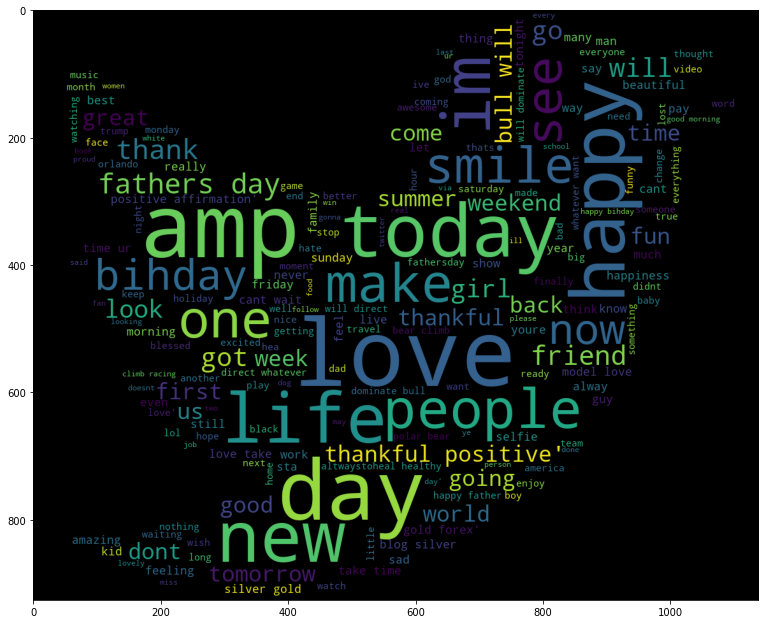

In [65]:

from wordcloud import WordCloud, ImageColorGenerator
import requests
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
image_colors = ImageColorGenerator(Mask)
wordcloud = WordCloud(background_color='black', height=150, width=400,mask=Mask).generate(str(words))
plt.figure(figsize = (13, 11)) 
plt.imshow(wordcloud) 
plt.axis("on") 
plt.show()

In [66]:
 
setwords=[]
for i in range(0,len(words)):
  word=words[i].split()
  setwords.append(word)

In [70]:

import itertools
import collections
all_words=list(itertools.chain(*setwords))
print(all_words[1:33])
words_freq=collections.Counter(all_words)
freq_word=pd.DataFrame(words_freq.most_common(20),columns=['words','Freq'])
freq_word

['father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction', 'run', 'thanks', 'for', 'lyft', 'credit', 'cant', 'use', 'cause', 'they', 'dont', 'offer', 'wheelchair', 'vans', 'in', 'pdx', 'disapointed', 'getthanked', 'bihday']


,words,Freq
0,the,10201
1,to,9855
2,you,5483
3,and,4905
4,in,4665
5,for,4495
6,of,4252
7,is,4186
8,my,3688
9,love,2738


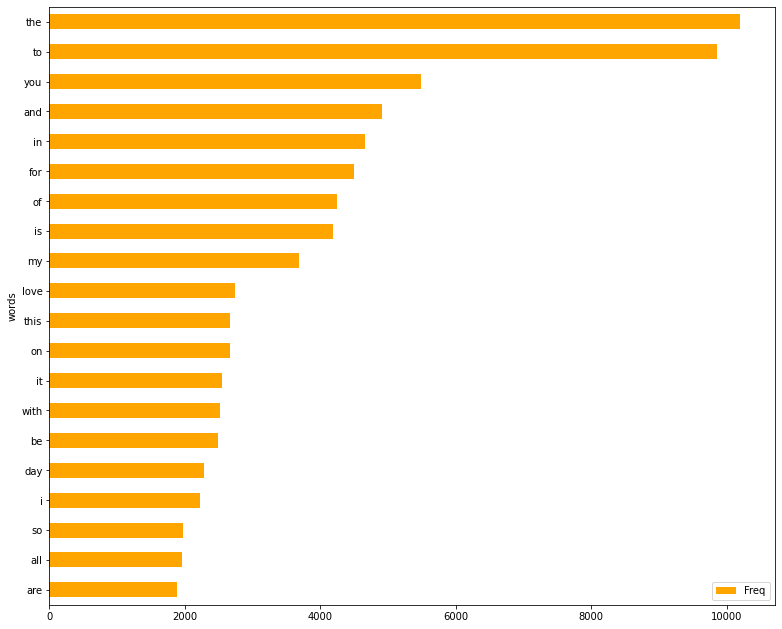

In [72]:
flg,ax=plt.subplots(figsize=(13,11))
freq_word.sort_values(by='Freq').plot.barh(x='words',y='Freq',ax=ax,color='orange')
plt.show();

In [73]:

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=1300, min_df=7, max_df=1.3, stop_words=stopwords.words('english'))
words = vectorizer.fit_transform(words).toarray()


In [79]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(words, labels, test_size=0.13, random_state=1)

In [89]:
x_train.shape

(27806, 1300)

In [90]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [91]:
predictions = text_classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[3824   38]
 [ 158  136]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      3862
           1       0.78      0.46      0.58       294

    accuracy                           0.95      4156
   macro avg       0.87      0.73      0.78      4156
weighted avg       0.95      0.95      0.95      4156

0.9528392685274302


In [92]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [93]:
y_pred = svclassifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[3839   23]
 [ 182  112]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3862
           1       0.83      0.38      0.52       294

    accuracy                           0.95      4156
   macro avg       0.89      0.69      0.75      4156
weighted avg       0.95      0.95      0.94      4156

0.9506737247353224
